
WeatherPy
Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | manado
Processing Record 6 of Set 1 | tinogasta
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | tevragh zeina
City not found. Skipping...
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | lacombe
Processing Record 14 of Set 1 | saudarkrokur
Processing Record 15 of Set 1 | north bend
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | skutskar
City not found. Skipping...
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | kardla
Processing Record 20 of Set 1 | halifax
Processing Record 21 of Set 1 | port glaud
City no

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,9.22,87,100,11.37,IS,1731361025
1,avarua,-21.2078,-159.7750,25.03,65,75,6.17,CK,1731361027
2,thompson,55.7435,-97.8558,-3.91,86,100,1.54,CA,1731361021
3,gadzhiyevo,69.2551,33.3362,2.24,87,100,7.39,RU,1731361029
4,manado,1.4870,124.8455,23.43,100,20,0.51,ID,1731361031


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,9.22,87,100,11.37,IS,1731361025
1,avarua,-21.2078,-159.7750,25.03,65,75,6.17,CK,1731361027
2,thompson,55.7435,-97.8558,-3.91,86,100,1.54,CA,1731361021
3,gadzhiyevo,69.2551,33.3362,2.24,87,100,7.39,RU,1731361029
4,manado,1.4870,124.8455,23.43,100,20,0.51,ID,1731361031


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

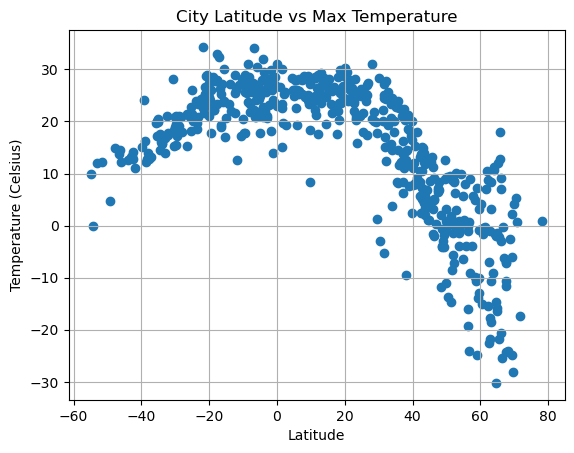

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

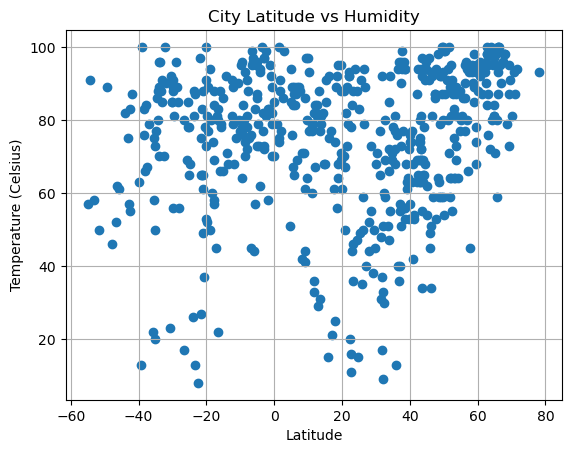

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

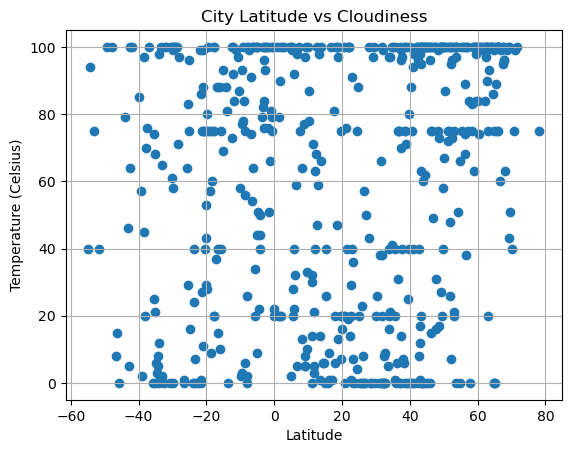

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')  # YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude Vs. Wind Speed Plot

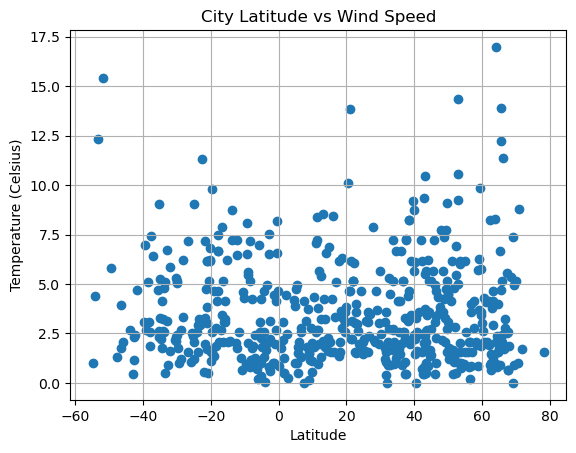

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.6408906161613082


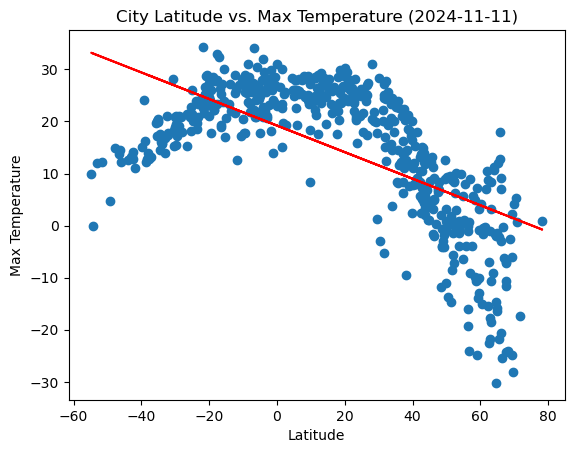

In [22]:
# Define a function to create Linear Regression plots
#####LAT VS Humidity#######

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.16721346292903783


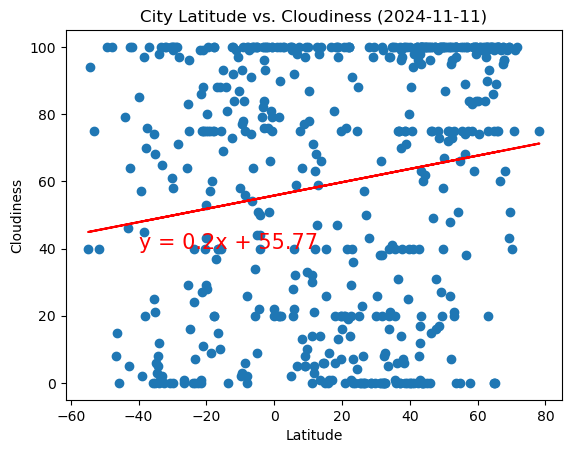

In [23]:
# Define a function to create Linear Regression plots
#####LAT VS Cloudiness#######
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.0007878274853780719


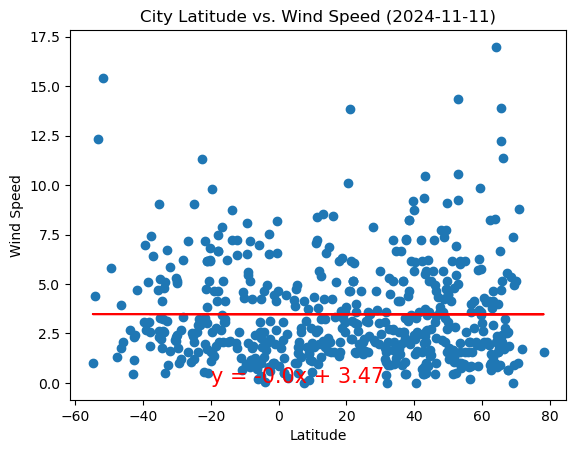

In [24]:
# Define a function to create Linear Regression plots
#####LAT VS Wind Speed#######
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-0),fontsize=15,color="red")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,9.22,87,100,11.37,IS,1731361025
2,thompson,55.7435,-97.8558,-3.91,86,100,1.54,CA,1731361021
3,gadzhiyevo,69.2551,33.3362,2.24,87,100,7.39,RU,1731361029
4,manado,1.4870,124.8455,23.43,100,20,0.51,ID,1731361031
6,olonkinbyen,70.9221,-8.7187,0.75,87,99,8.79,SJ,1731361014


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,25.03,65,75,6.17,CK,1731361027
5,tinogasta,-28.0632,-67.5649,17.88,56,97,3.35,AR,1731361032
8,port-aux-francais,-49.3500,70.2167,4.78,89,100,5.79,TF,1731361036
9,papatowai,-46.5619,169.4708,13.73,52,8,3.96,NZ,1731361038
10,east london,-33.0153,27.9116,16.75,85,2,3.15,ZA,1731360773


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8242606883156155


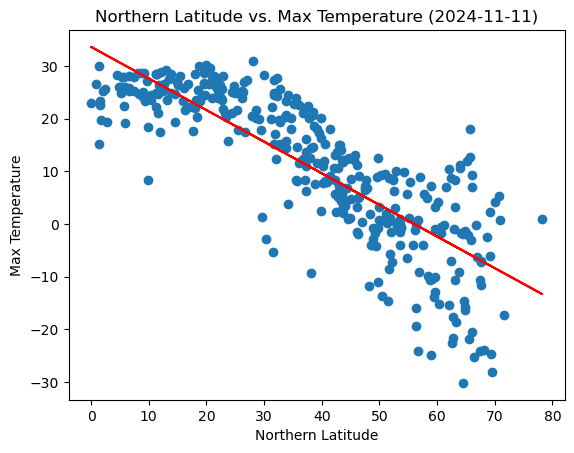

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.title(f"Northern Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7050504990311485


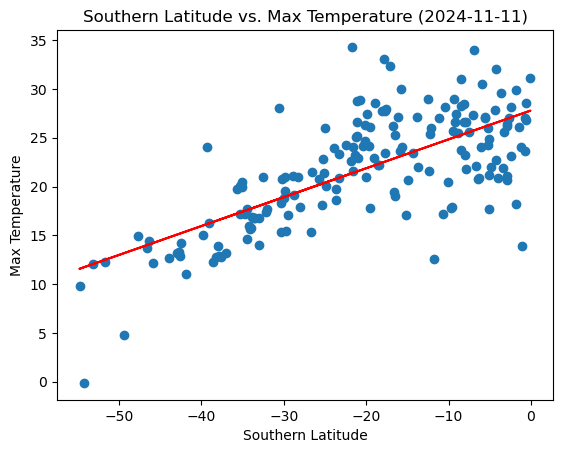

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.title(f"Southern Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The linear relationship between latitude and maximum temperature in the northern hemisphere has a strong negative correlation, as seen by the r-value of -0.8242606883156155. This lends proof to the idea that cities in an area experience higher maximum temperatures as we get closer to the equator, where latitude approaches zero. The scatter plot also makes this association clear.

The linear relationship between latitude and maximum temperature in the southern hemisphere has a high positive correlation, as indicated by the r-value of 0.7050504990311485. As we travel farther from the equator in the Southern Hemisphere, this suggests that the maximum temperatures in some cities rise.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.28383610796970554


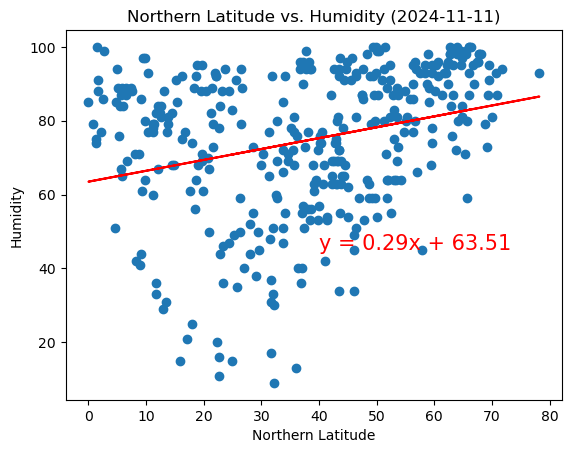

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.title(f"Northern Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.2297054733429726


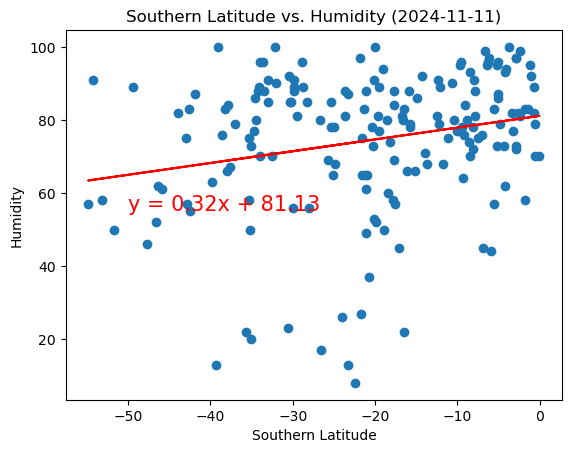

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title(f"Southern Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** In both cases, we can see the r-value is 0.2 which suggests there is not a strong positive correlation between latitude and cloudiness in the northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.33502104386408854


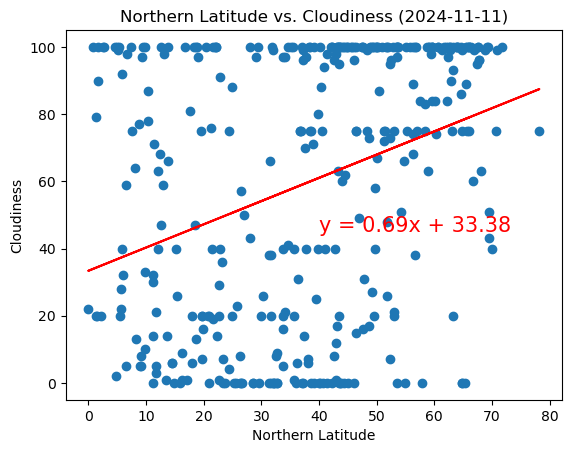

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.title(f"Northern Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.2003441572880791


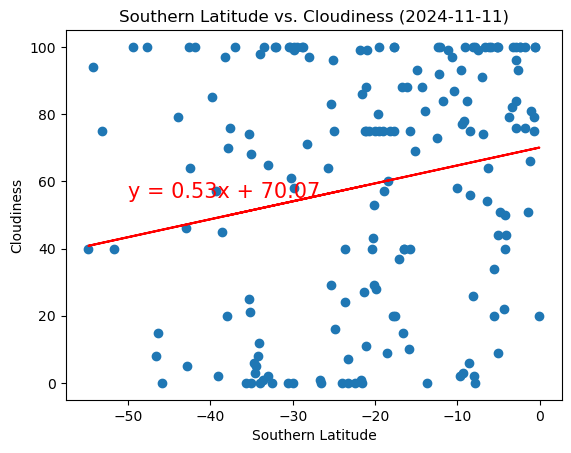

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title(f"Southern Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.10543219777251035


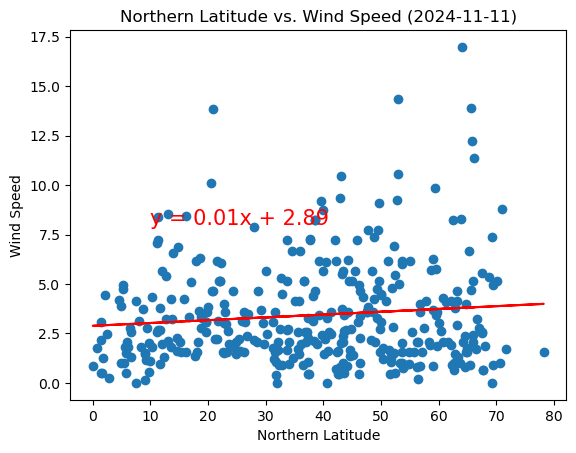

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.title(f"Northern Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.14639438237602226


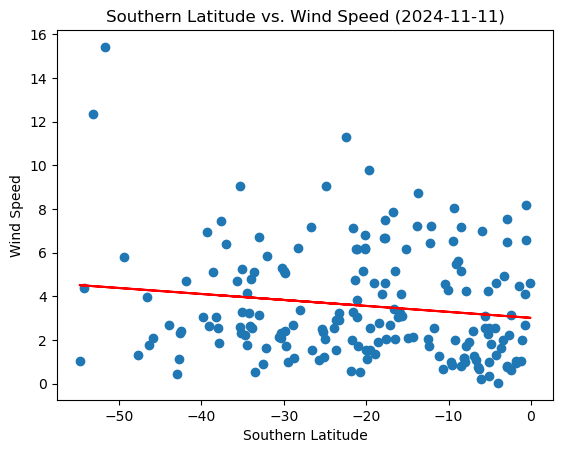

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title(f"Southern Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.105432 indicates that there is essentially no association between latitude and wind speed in the Northern Hemisphere. Latitude and wind speed in the southern hemisphere appear to be weakly correlated negatively, according to the r-value of -0.1463943.